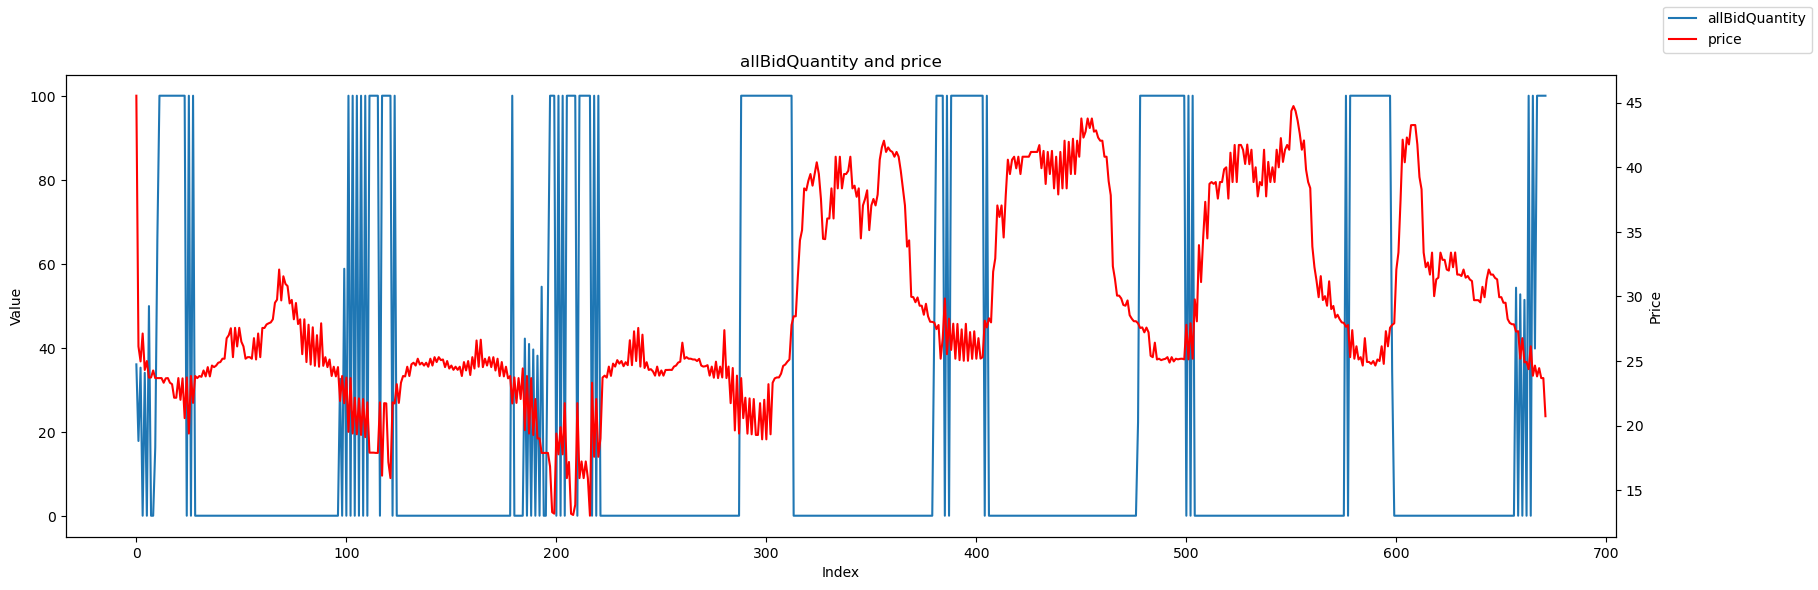

In [5]:
# comparing price and bid amount from seperate optimization

import pandas as pd
import matplotlib.pyplot as plt

# Import the CSV file
df = pd.read_csv("optimizedBidAmount_regular_prod.csv")

df_sliced = df[0:672]

fig, ax1 = plt.subplots(figsize=(20, 6))

ax1.plot(df_sliced['allBidQuantity'], label='allBidQuantity')
ax1.set_xlabel('Index')
ax1.set_ylabel('Value')
ax1.set_title('allBidQuantity and price')

ax2 = ax1.twinx()
ax2.plot(df_sliced['price'], color='red', label='price')
ax2.set_ylabel('Price')

fig.legend(loc='upper right')
plt.show()


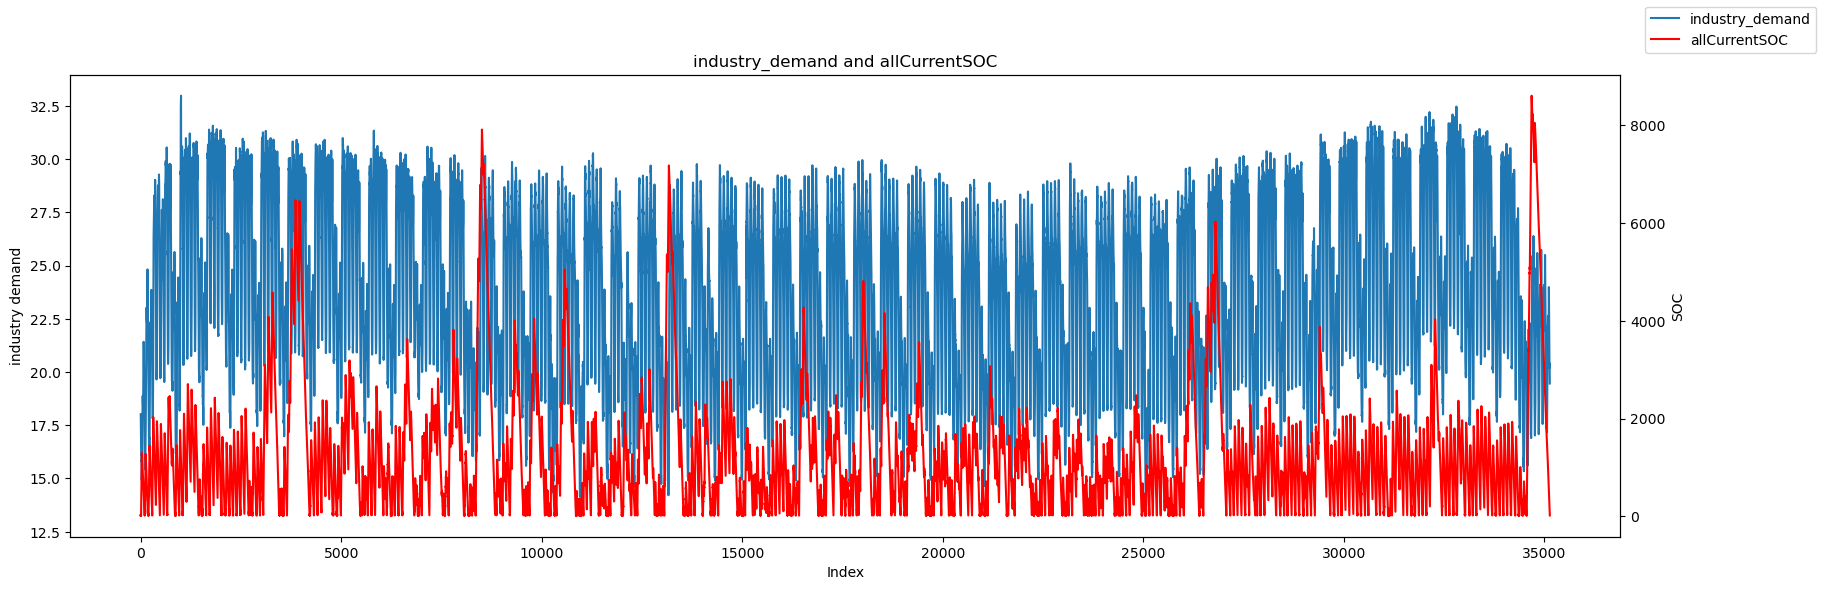

In [6]:
#SOC status vs industry demand - from seperate optimization

fig, ax1 = plt.subplots(figsize=(20, 6))

ax1.plot(df['industry_demand'], label='industry_demand')
ax1.set_xlabel('Index')
ax1.set_ylabel('industry demand')
ax1.set_title('industry_demand and allCurrentSOC')

ax2 = ax1.twinx()
ax2.plot(df['allCurrentSOC'], color='red', label='allCurrentSOC')
ax2.set_ylabel('SOC')

fig.legend(loc='upper right')
plt.show()


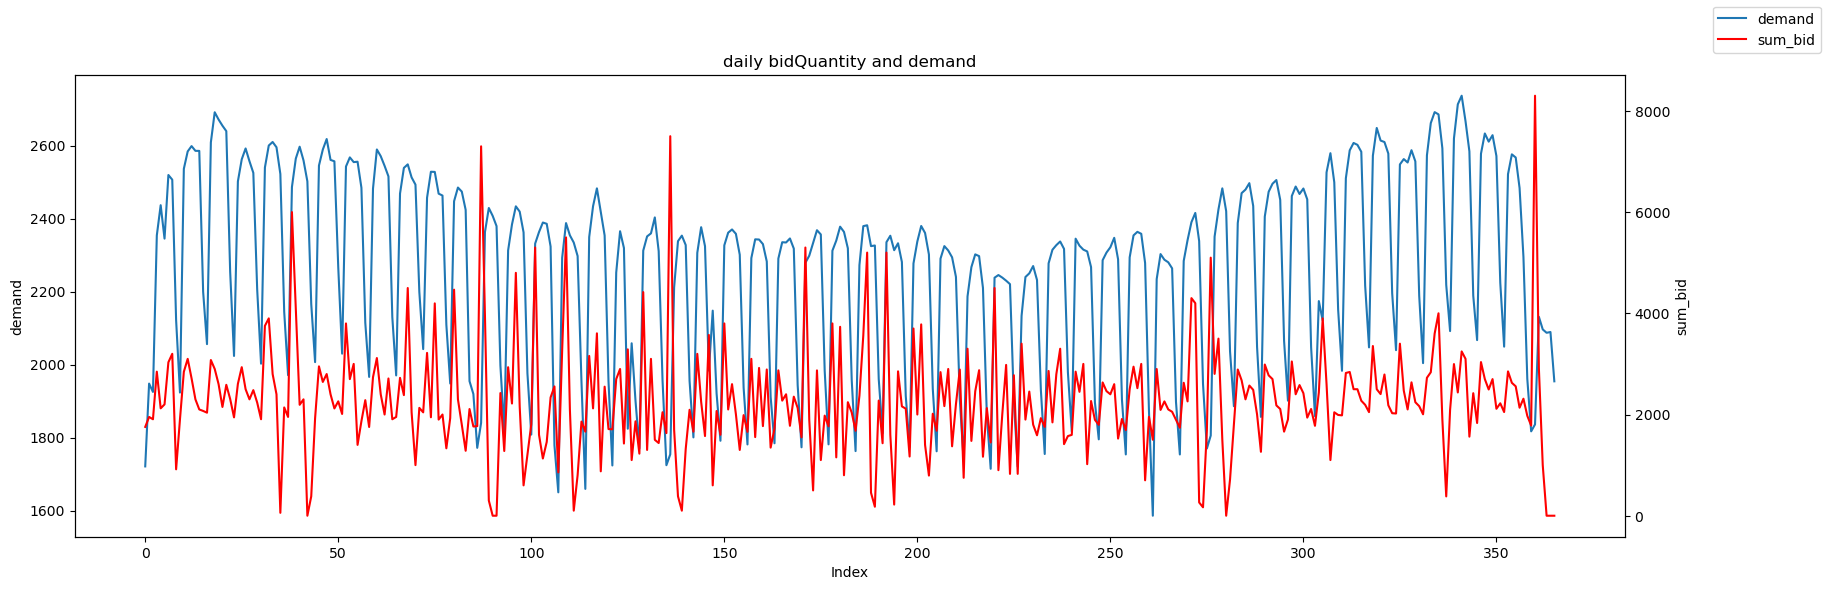

In [7]:
#Resapling daily demand and bid quantity from seperate optimization 
sum_demand = []
sum_bid = []
foresight = 96
industry_demand = list(df["industry_demand"])
bidQuantity = list(df['allBidQuantity'])
interval_count = len(bidQuantity) // foresight
for interval in range(interval_count):
    start_idx = interval * foresight #start point for time interval
    end_idx = (interval + 1) * foresight #start point for time interval
    interval_industrial_demand = industry_demand[start_idx:end_idx]
    interval_bidQuantity = bidQuantity[start_idx:end_idx] #setting intervals for price
    interval_demand = industry_demand[start_idx:end_idx]
    
    sum_demand.append(sum(interval_demand))
    sum_bid.append(sum(interval_bidQuantity))

fig, ax1 = plt.subplots(figsize=(20, 6))

ax1.plot(sum_demand, label='demand')
ax1.set_xlabel('Index')
ax1.set_ylabel('demand')
ax1.set_title('daily bidQuantity and demand')

ax2 = ax1.twinx()
ax2.plot(sum_bid, color='red', label='sum_bid')
ax2.set_ylabel('sum_bid')

fig.legend(loc='upper right')
plt.show()
